In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"evriliyasyahutami","key":"304b19e33d3c1fe20bf4465b01154e46"}'}

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d imgowthamg/car-price

  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 30.7MB/s]


In [7]:
!mkdir car-price
!unzip car-price.zip -d car-price
!ls car-price

Archive:  car-price.zip
  inflating: car-price/CarPrice_Assignment.csv  
  inflating: car-price/Data Dictionary - carprices.xlsx  
 CarPrice_Assignment.csv  'Data Dictionary - carprices.xlsx'


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [10]:
df = pd.read_csv('car-price/CarPrice_Assignment.csv')

In [11]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<Axes: >

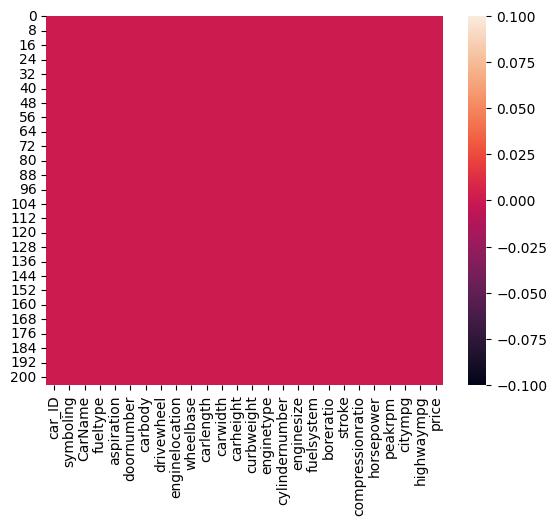

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<ipython-input-15-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

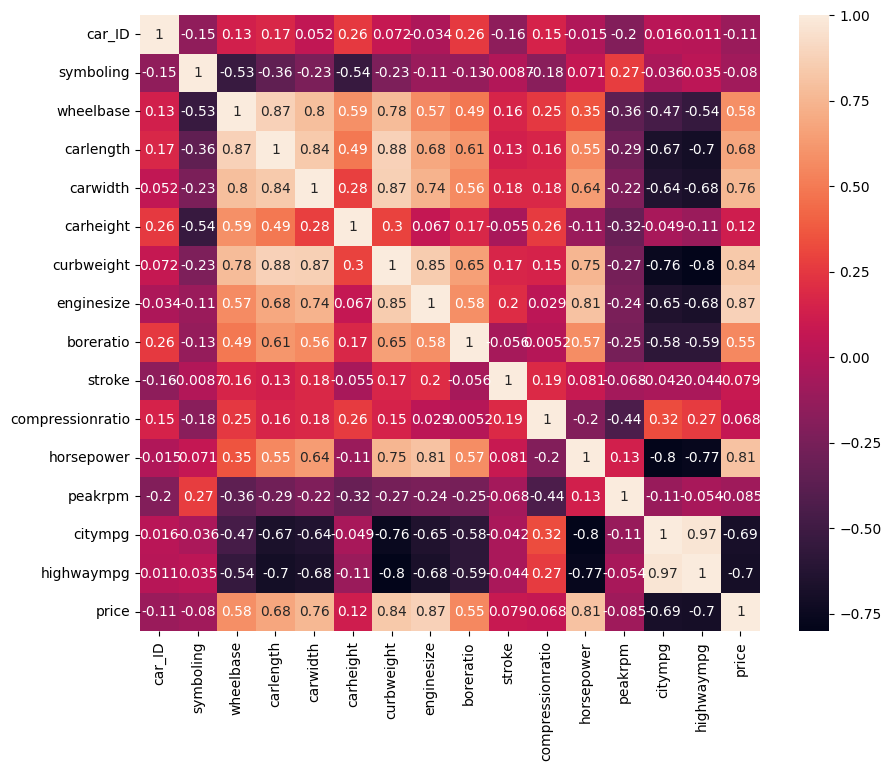

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [17]:
CarName = df.groupby('CarName').count()[['wheelbase']].sort_values(by='wheelbase',ascending=True).reset_index()
CarName = CarName.rename(columns={'wheelbase':'numberOfCars'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146]),
 [Text(0, 0, 'Nissan versa'),
  Text(1, 0, 'porsche macan'),
  Text(2, 0, 'porsche boxter'),
  Text(3, 0, 'porcshce panamera'),
  Text(4, 0, 'plymouth valiant'),
  Tex

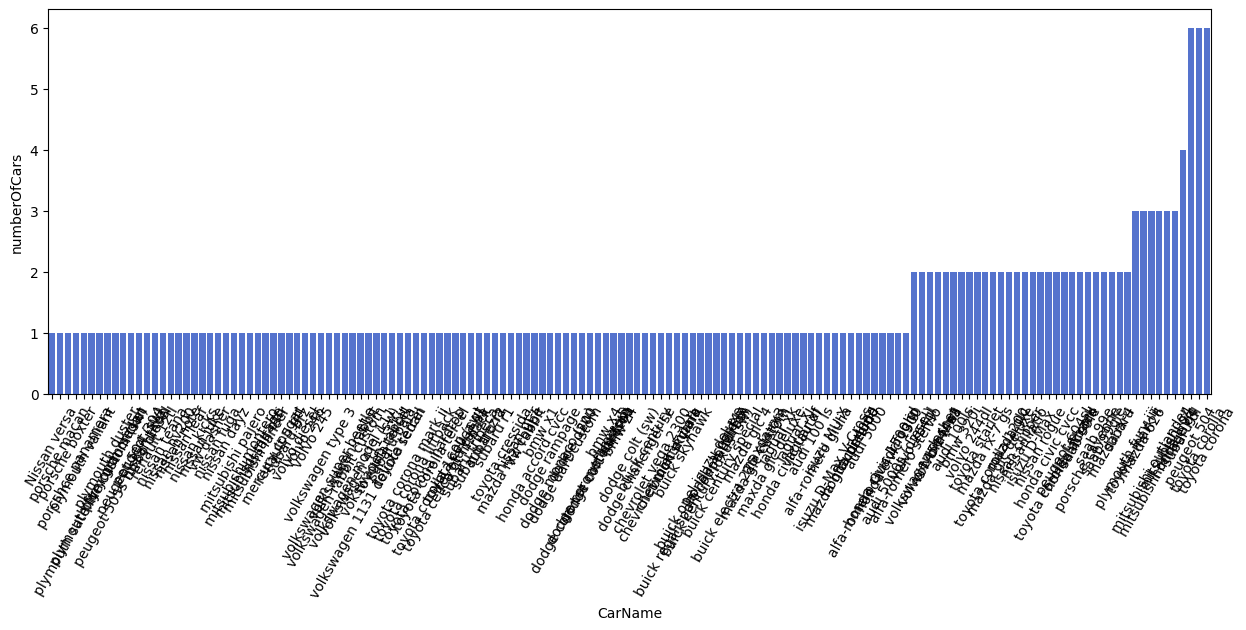

In [19]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=CarName['CarName'], y=CarName['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

In [26]:
engine = df.groupby('enginesize').count()[['wheelbase']].sort_values(by='wheelbase').reset_index()
engine = engine.rename(columns={'wheelbase':'count'})

<Axes: xlabel='enginesize', ylabel='count'>

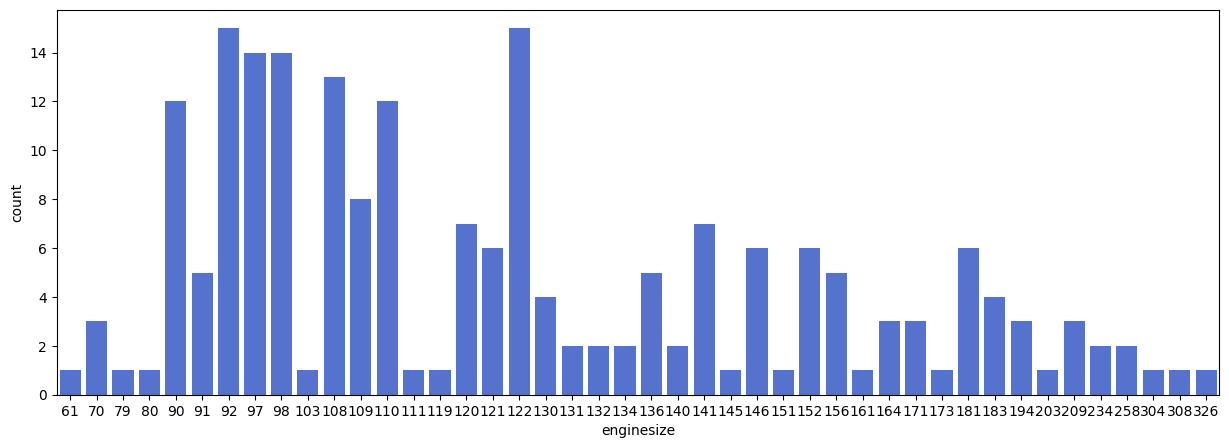

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['enginesize'], y=engine['count'], color='royalblue')

<Figure size 1000x500 with 0 Axes>

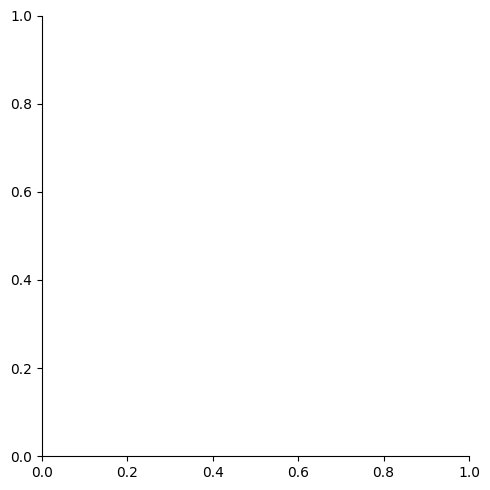

In [30]:
plt.figure(figsize=(10, 5))
sns.displot(df='horsepower')

<Figure size 1000x500 with 0 Axes>

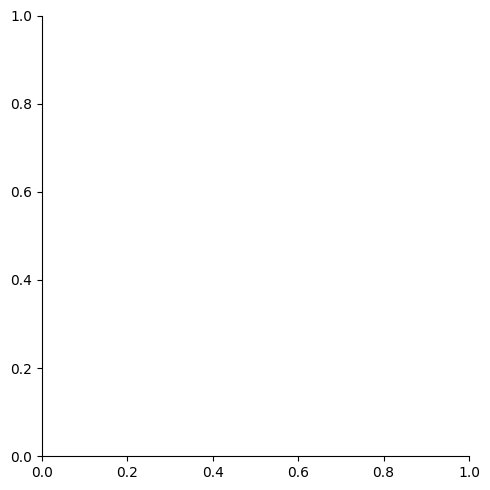

In [32]:
plt.figure(figsize=(10, 5))
sns.displot(df='price')

In [35]:
features = ['car_ID','symboling','wheelbase','carheight','curbweight','enginesize','horsepower','compressionratio']
x = df[features]
y = df['price']
x.shape, y.shape

((205, 8), (205,))

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(52,)

In [37]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [38]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier =', score)

akurasi model regresi linier = 0.6846893856851628


In [40]:
input_data = np.array([[2019,5000,145,30.2,2]])

prediction = lr.predict(x_test)
print('Estimasi harga mobil  EUR :', prediction)

Estimasi harga mobil  EUR : [ 5761.69839351  4622.04885879  6092.69843608 30012.50466115
 13395.24643657  5346.69706526 18429.03645463 15566.72345584
 21483.43961198  6519.76752366 24755.15629433  5605.57450808
  6550.37979691 13367.29570648 11606.34483066 19443.06072684
  5678.27129095 11827.74738107  7038.11001215 19287.08001837
 20646.842835    9322.39566416 10309.74838463 11679.11992086
 12177.35148443 10348.58970276  8783.22496384 13275.47480304
  5648.48336554 18892.62219952  6105.96864401 22789.90150992
  6753.95834679 19268.21714214 11083.77213212  1898.90221023
 11319.63988134 14726.02755445 14998.18807075  6723.62166649
 17620.69234468 14707.61400345  6734.96630011  6757.48997785
 10473.06172296  9875.48745481  9050.94516006  6415.84447786
  6879.06448968 12596.47879571 14929.79918849  5794.53267814]


In [41]:
import pickle

filename = 'estimasi_mobil.sav'
pickle.dump(lr,open(filename,'wb'))